In [1]:
# 前準備
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

# グラフの線の種類
linestyles = ['-', '--', ':']

# 期待値
def E(X, g=lambda x: x):
    x_set, f=X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 分散
def V(X, g=lambda x: x):
    x_set, f=X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 確率変数を引数とし、その確率が確率の性質を満たしているか確認する
# 期待値と分散を求める
def check_prob(X):
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は{E(X): .4}')
    print(f'分散は{V(X): .4}')
    
# 確率関数を引数に、確率変数の確率関数と期待値を図示する
def plot_prob(X):
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

In [2]:
# ベルヌーイ分布の確率変数を求める
# →0か1かしか取らない離散型確率(e.g. コインの表裏など)
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0;
    return x_set, f

In [3]:
p = 0.3
X = Bern(p)

In [4]:
check_prob(X)

期待値は 0.3
分散は 0.21


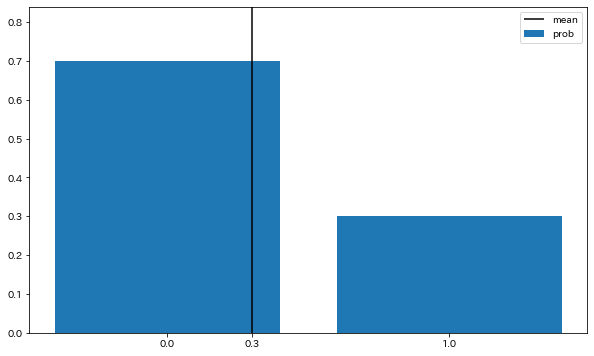

In [5]:
plot_prob(X)

In [6]:
# ベルヌーイ分布にしたがう確率変数を作る(scipy)
rv = stats.bernoulli(p)

In [7]:
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [8]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [9]:
# 累積密度関数を計算する
rv.cdf([0, 1])

array([0.7, 1. ])

In [10]:
# 期待値と分散を計算する
rv.mean(), rv.var()

(0.3, 0.21)

In [15]:
# 二項分布
# →成功確率pのベルヌーイ試行をn回行ったときの成功回数が従う分布
from scipy.special import comb
def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f


In [16]:
n = 10
p = 0.3
X = Bin(n, p)

In [17]:
check_prob(X)

期待値は 3.0
分散は 2.1


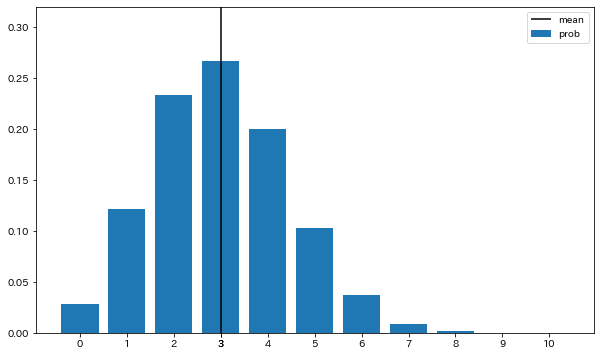

In [18]:
plot_prob(X)

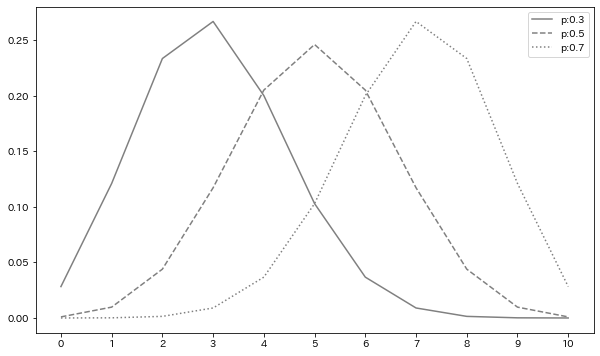

In [19]:
# 試行回数:10で
# 成功確率を変化させた時のグラフ
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [20]:
# 幾何分布
# →n回ベルヌーイ試行を繰り返したときに初めてする確率分布
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [21]:
p = 0.5
X = Ge(p)

In [22]:
check_prob(X)

期待値は 2.0
分散は 2.0


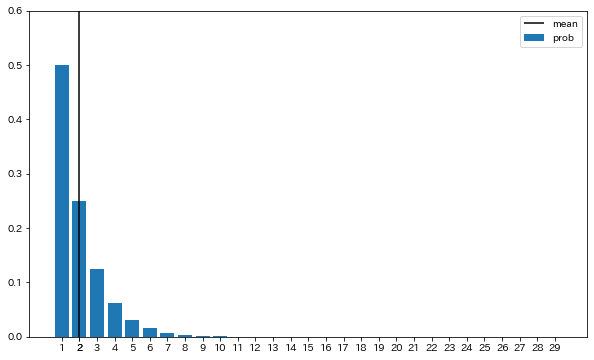

In [23]:
plot_prob(X)

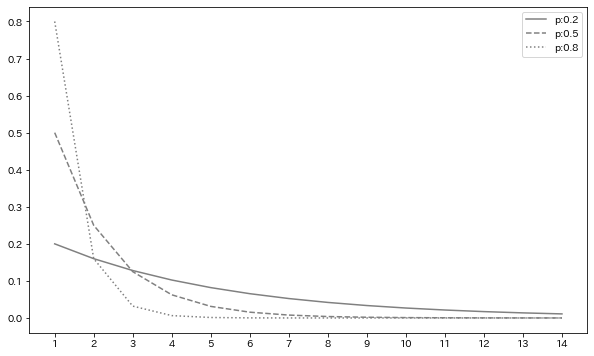

In [25]:
# 幾何分布を描画する(scipy)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
    
plt.show()

In [26]:
# ポアソン分布
# →単位時間当たりに平均λ回起こる様な事象が従う確率分布
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [27]:
lam = 3
X = Poi(lam)

In [28]:
check_prob(X)

期待値は 3.0
分散は 3.0


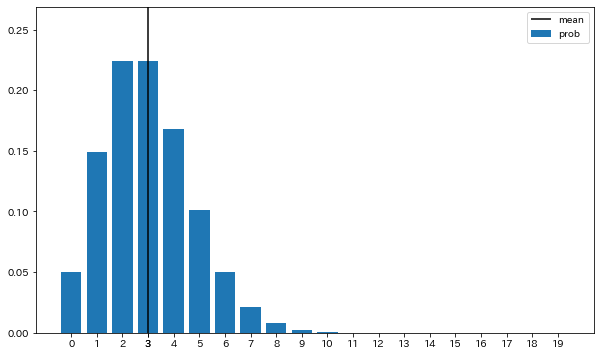

In [29]:
plot_prob(X)

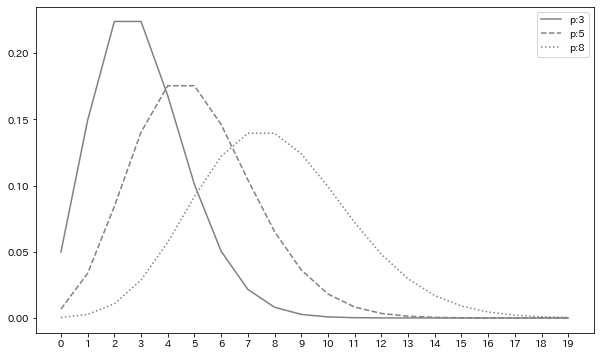

In [30]:
# 幾何分布を描画する(scipy)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for p, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
    
plt.show()